# "Logistic regression" is a ML classification problem algorithm.
It is used to predict the probability of a categorical dependent variable.

In htis model the dependent variable is always a binary variable that contains data coded as 1 (YES) and 0 (NO).

In statistical terms the model predicts P(Y=1) as a function of X

Important points:

    Dependent variable always binary
  
    Only meaningful variable should be included
    
    Independent variable should be independent of one another (i.e should not ne multi-collinear) 
    
    Large sample sizes
    
    Independent variables linearly co-related to the log odds

# Packages needed:

Python packages needed:

    import pandas as pd
    
    import numpy as np
    
Viz packages needed:

    import matplotlib.pyplot as plt
    
    import seaborn as sns
    
sklearn packages needed:

    from sklearn import preprocessing
    
    from sklearn.model_selection import train_test_split
    
    from sklearn.linear_model import LogisticRegression 
    


In [163]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
!pip install imblearn
from imblearn.over_sampling import SMOTE
#to define viz specifications 
plt.rc("font", size = 14)
sns.set (style = "white")
sns.set (style = "whitegrid", color_codes = True)

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [164]:
#importing the dataframe for processing
df = pd.read_excel('MyPersonalData.xlsx')

In [165]:
#quick assessment of the dataframe types
df.dtypes

Date                         datetime64[ns]
WalkingTime                           int64
CyclingTime                           int64
SleepingTime                        float64
Studying                              int64
Weight                                int64
Moving out for relaxation             int64
Time spent with friends               int64
Alcohol intake                        int64
Craving for food                      int64
GuiltyFeel                            int64
dtype: object

In [56]:
# assessing the number of rows and the number of columns in the datframe
df.shape

(824, 11)

In [51]:
#getting an overview of the dataframe
df.head(2)

,Date,WalkingTime,CyclingTime,SleepingTime,Studying,Weight,Moving out for relaxation,Time spent with friends,Alcohol intake,Craving for food,GuiltyFeel
0,2015-10-01,79,45,7.0,60,84,0,30,0,1,0
1,2015-10-02,56,46,5.0,45,84,1,120,1,1,1


# Data description:
    'Date' : datetime object
    
    'WalkingTime' : integer and signifies the amount of time I walked per day (in minutes)
    
    'CyclingTime' : integer and signifies the amount of time I biked per day (in minutes)
    
    'SleepingTime' : float and signifies the amount of time I slept per day (in hours)
    
    'Studying': integer and signifies the amount of time I studied per day (in minutes)
    
    'Weight': integer and signifies my weight (in kilograms)
    
    'Moving out for relaxation': binary integer and signifies 1= moved out, 0 = did not move out
    
    'Time spent with friends': integer and signifies the amount of time I spent per day with my friends (in minutes)
    
    'Alcohol intake': binary integer and signifies 1= drank alcohol, 0 = did not drink alcohol
    
    'Craving for food': binary integer and signifies 1= craved for food, 0 = did not crave for food
    
    'GuiltyFeel': binary integer and signifies 1= had guilty feel, 0 = did not have guilty feel
    

In [166]:
#converting 'SleepingTime' to minutes and an integer
df['SleepingTime'] = df['SleepingTime']*60
df['SleepingTime'] = df['SleepingTime'].astype(int)

In [142]:
df.columns

Index(['Date', 'WalkingTime', 'CyclingTime', 'SleepingTime', 'Studying',
       'Weight', 'Moving out for relaxation', 'Time spent with friends',
       'Alcohol intake', 'Craving for food', 'GuiltyFeel'],
      dtype='object')

# Data Exploration with data viz

In the dataframe there are multiple target or dependent variables.

1. 'Moving out for relaxation'

2. 'Alcohol intake'

3. 'Craving for food'

4. 'GuiltyFeel'

Measure the value counts of each of the target feature

Data viz at this stage will provide an overview of the binary distribution

Also calculate the respective percentages of the binary categories

In [62]:
df['Moving out for relaxation'].value_counts()

0    574
1    250
Name: Moving out for relaxation, dtype: int64

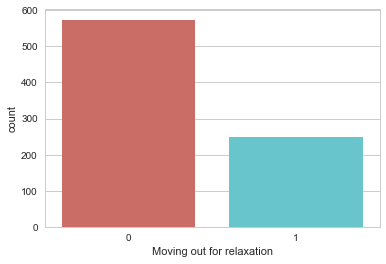

In [120]:
sns.countplot(x='Moving out for relaxation', data = df, palette = 'hls')

In [78]:
no = len(df[df['Moving out for relaxation'] == 0])
yes = len(df[df['Moving out for relaxation'] == 1])
percent_no = no/(no+yes)
print ('% of not going out',percent_no*100)
percent_yes = yes/(no+yes)
print ('% of going out' ,percent_yes*100)

% of not going out 69.66019417475728
% of going out 30.339805825242717


In [63]:
df['Alcohol intake'].value_counts()

0    697
1    127
Name: Alcohol intake, dtype: int64

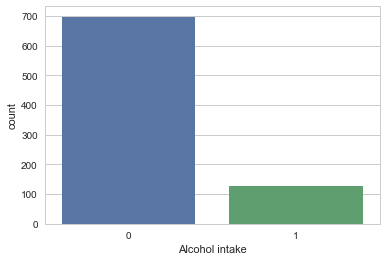

In [66]:
sns.countplot(x='Alcohol intake', data = df)

In [79]:
no = len(df[df['Alcohol intake'] == 0])
yes = len(df[df['Alcohol intake'] == 1])
percent_no = no/(no+yes)
print ('% of not drinking alcohol',percent_no*100)
percent_yes = yes/(no+yes)
print ('% of drinking alcohol' ,percent_yes*100)

% of not drinking alcohol 84.5873786407767
% of drinking alcohol 15.4126213592233


In [67]:
df['Craving for food'].value_counts()

0    681
1    143
Name: Craving for food, dtype: int64

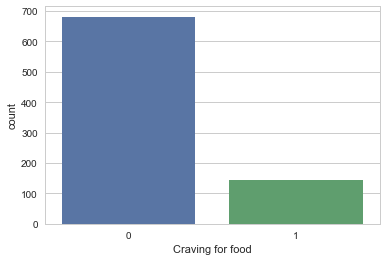

In [68]:
sns.countplot(x='Craving for food',data =df)

In [80]:
no = len(df[df['Craving for food'] == 0])
yes = len(df[df['Craving for food'] == 1])
percent_no = no/(no+yes)
print ('% of not craving for food',percent_no*100)
percent_yes = yes/(no+yes)
print ('% of carving for food' ,percent_yes*100)

% of not craving for food 82.64563106796116
% of carving for food 17.354368932038835


In [69]:
df['GuiltyFeel'].value_counts()

0    635
1    189
Name: GuiltyFeel, dtype: int64

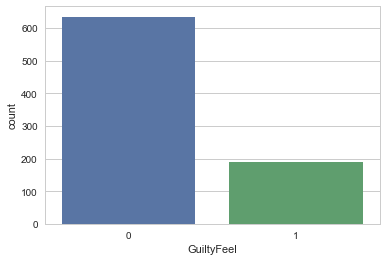

In [70]:
sns.countplot(x = 'GuiltyFeel', data=df)

In [81]:
no = len(df[df['GuiltyFeel'] == 0])
yes = len(df[df['GuiltyFeel'] == 1])
percent_no = no/(no+yes)
print ('% of not having GuiltyFeel',percent_no*100)
percent_yes = yes/(no+yes)
print ('% of having GuiltyFeel' ,percent_yes*100)

% of not having GuiltyFeel 77.06310679611651
% of having GuiltyFeel 22.936893203883496


# Balancing the classes:

For instance the ratio between having a guilty feel and not having a guilty feel = 23:77, which has a wide variance. Therefore the
    independented parameters have to be balanced. 

One easy of balancing classes is to calculate the mean

In [121]:
df.groupby('Moving out for relaxation').mean()

,WalkingTime,CyclingTime,SleepingTime,Studying,Weight,Time spent with friends,Alcohol intake,Craving for food,GuiltyFeel
Moving out for relaxation,,,,,,,,,
0,31.501742,59.116725,461.236934,104.789199,78.142857,31.940767,0.149826,0.172474,0.224739
1,31.892000,55.968000,527.472000,111.908000,78.108000,39.056000,0.164000,0.176000,0.240000


In [84]:
df.groupby('Alcohol intake').mean()

,WalkingTime,CyclingTime,SleepingTime,Studying,Weight,Moving out for relaxation,Time spent with friends,Craving for food,GuiltyFeel
Alcohol intake,,,,,,,,,
0,32.134864,58.131994,28615.093257,105.529412,78.172166,0.299857,32.362984,0.05165,0.117647
1,28.795276,58.322835,30333.543307,114.740157,77.913386,0.322835,43.629921,0.84252,0.842520


In [85]:
df.groupby('Craving for food').mean()

,WalkingTime,CyclingTime,SleepingTime,Studying,Weight,Moving out for relaxation,Time spent with friends,Alcohol intake,GuiltyFeel
Craving for food,,,,,,,,,
0,32.161527,58.063142,28535.154185,104.513950,78.077827,0.302496,31.913363,0.029369,0.120411
1,29.041958,58.629371,30521.958042,118.545455,78.391608,0.307692,44.510490,0.748252,0.748252


In [86]:
df.groupby('GuiltyFeel').mean()

,WalkingTime,CyclingTime,SleepingTime,Studying,Weight,Moving out for relaxation,Time spent with friends,Alcohol intake,Craving for food
GuiltyFeel,,,,,,,,,
0,31.440945,58.480315,28690.582677,101.817323,78.155906,0.299213,32.503937,0.031496,0.056693
1,32.222222,57.089947,29516.190476,124.190476,78.052910,0.317460,39.460317,0.566138,0.566138


# Observations after balancing:
    
    1. Chances of alcohol intake and craving for food increases when I spend more time with friends
    
    2. When I take alcohol or crave for food my sleeping time increases
    
    3. when I study more, I crave for food
    
    4. When I move out for relaxation  and spend more time with my friends, I feel more guilty
    
More can be generated .. . ...
    
    

# Additional Visualizations:
    
    Multiple combinations of independent and target variables can be generated based on needs and wants

I sleep more when i do not have a guilty feel


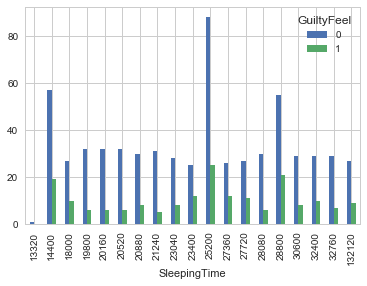

In [92]:
pd.crosstab (df.SleepingTime, df.GuiltyFeel). plot (kind = 'bar')
plt.title = ("Relation between sleeping time and GuiltyFeel")
print ('I sleep more when i do not have a guilty feel')

I sleep more when i do not have a guilty feel


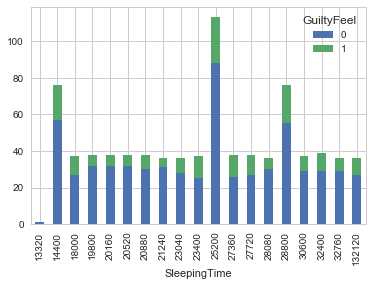

In [94]:
pd.crosstab (df.SleepingTime, df.GuiltyFeel). plot (kind = 'bar', stacked = True)
plt.title = ("Relation between sleeping time and GuiltyFeel")
print ('I sleep more when i do not have a guilty feel')

I sleep more when i do not have a guilty feel


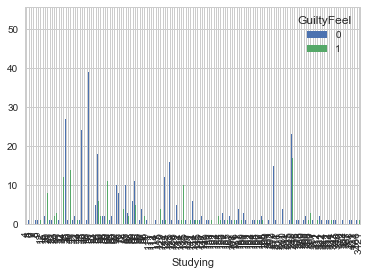

In [93]:
pd.crosstab (df.Studying, df.GuiltyFeel). plot (kind = 'bar')
plt.title = ("Relation between studying time and GuiltyFeel")
print ('I stydy more when i do not have a guilty feel')

Text(0,0.5,'Frequency')

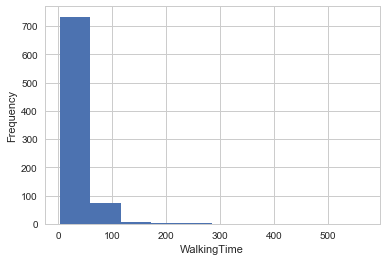

In [99]:
df.WalkingTime.hist()
plt.xlabel('WalkingTime')
plt.ylabel('Frequency')


Text(0,0.5,'Frequency')

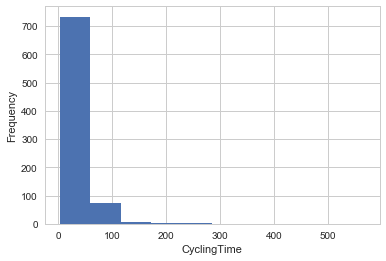

In [100]:
df.WalkingTime.hist()
plt.xlabel('CyclingTime')
plt.ylabel('Frequency')

# Create dummy variables

https://www.moresteam.com/whitepapers/download/dummy-variables.pdf
    
That is variables with only two values, zero and one.

In [171]:
cat_vars=['Date', 'WalkingTime', 'CyclingTime', 'SleepingTime', 'Studying',
       'Weight', 'Moving out for relaxation', 'Time spent with friends',
       'Alcohol intake', 'Craving for food', 'GuiltyFeel']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data1=df.join(cat_list)
    df=data1
cat_vars=['Date', 'WalkingTime', 'CyclingTime', 'SleepingTime', 'Studying',
       'Weight', 'Moving out for relaxation', 'Time spent with friends',
       'Alcohol intake', 'Craving for food', 'GuiltyFeel']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
    



In [186]:
data_final=df
data_final.columns.values

array(['Date', 'WalkingTime', 'CyclingTime', ..., 'Craving for food_1',
       'GuiltyFeel_0', 'GuiltyFeel_1'], dtype=object)

In [187]:
data_final.shape

(824, 1210)

# Over-sampling using SMOTE:
    
    up-sample the "GuilyFeel" using the SMOTE algorithm(Synthetic Minority Oversampling Technique). 
    
    SMOTE:

    Works by creating synthetic samples from the minor class (no-GuiltyFeel) instead of creating copies.
    
    Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [180]:
logreg = LogisticRegression()

In [201]:
X = data_final.loc[:, ['WalkingTime', 'CyclingTime', 'SleepingTime', 'Studying',
       'Weight','Time spent with friends']]
y = data_final.loc[:, 'GuiltyFeel']

In [204]:
os = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['GuiltyFeel'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['GuiltyFeel']==0]))
print("Number of subscription",len(os_data_y[os_data_y['GuiltyFeel']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['GuiltyFeel']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['GuiltyFeel']==1])/len(os_data_X))


length of oversampled data is  1156
Number of no subscription in oversampled data 578
Number of subscription 578
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [205]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True]
[1 1 1 1 1 1]


# Recursive Feature Elimination:
    
    Based on the idea to repeatedly construct a model and choose the best or the worst preforming feature
    
    Setting the feature aside and then repeating the same process with the rest of the features.
    
    This process is repated until all the features are exhausted
    
    Actual goal of RFE is to select features by recursively considering smaller and smaller sets of features.
    

In [196]:
y = ['GuiltyFeel']
x = [i for i in df if i not in y]

In [197]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [207]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
print(rfe)

[ True  True  True  True  True  True]
[1 1 1 1 1 1]
RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=20, step=1, verbose=0)


In [208]:
cols=['WalkingTime', 'CyclingTime', 'SleepingTime', 'Studying',
       'Weight','Time spent with friends'] 
X=os_data_X[cols]
y=os_data_y['GuiltyFeel']

# Implementing the model

In [209]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

C:\Users\Arunakiry Natarajan\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.688096
         Iterations 5
                            Results: Logit
Model:                Logit              No. Iterations:     5.0000   
Dependent Variable:   GuiltyFeel         Pseudo R-squared:   0.007    
Date:                 2018-09-27 22:59   AIC:                1602.8789
No. Observations:     1156               BIC:                1633.1952
Df Model:             5                  Log-Likelihood:     -795.44  
Df Residuals:         1150               LL-Null:            -801.28  
Converged:            1.0000             Scale:              1.0000   
----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
----------------------------------------------------------------------
WalkingTime             -0.0015   0.0020 -0.7836 0.4333 -0.0054 0.0023
CyclingTime             -0.0020   0.0015 -1.2781 0.2012 -0.0050 0.0010
Sle

# Fitting the model and checking the accuracy of the fit


In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [211]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.54


# Confusion Matrix:
    
    a summary of prediction results on a classification problem.
    
    shows the ways in which your classification model
    is confused when it makes predictions.

    Expected down the side: Each row of the matrix corresponds to a predicted class.
        
    Predicted across the top: Each column of the matrix corresponds to an actual class.
        
    The counts of correct and incorrect classification are then filled into the table.
    
Accuracy: Overall, how often is the classifier correct?
(TP+TN)/total

Misclassification Rate: Overall, how often is it wrong?
(FP+FN)/total
equivalent to 1 minus Accuracy
also known as "Error Rate"

True Positive Rate: When it's actually yes, how often does it predict yes?
TP/actual yes 
also known as "Sensitivity" or "Recall"

False Positive Rate: When it's actually no, how often does it predict yes?
FP/actual no

Specificity: When it's actually no, how often does it predict no?
TN/actual no 
equivalent to 1 minus False Positive Rate

Precision: When it predicts yes, how often is it correct?
TP/predicted yes 

Prevalence: How often does the yes condition actually occur in our sample?
actual yes/total                     

In [212]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[111  62]
 [ 96  78]]


In [ ]:
The result means that we have 111+78 correct predictions and 96+62 incorrect predictions.

# Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [214]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.54      0.64      0.58       173
          1       0.56      0.45      0.50       174

avg / total       0.55      0.54      0.54       347



# Interpretation:
Of the entire test set, 55% of times i felt guilty.

# The receiver operating characteristic (ROC) curve:
    is another common tool used with binary classifiers. 
    
    The dotted line represents the ROC curve of a purely random classifier; 
    
    a good classifier stays as far away from that line as possible (toward the top-left corner).

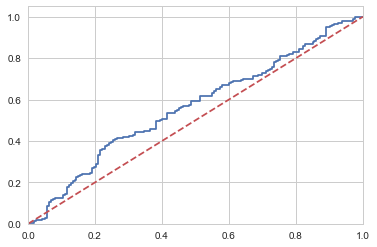

In [216]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.show()